In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
plt.rcParams['figure.figsize'] = (10, 8)

In [6]:
import sys
sys.path.insert(0, '../rapid2018/')

In [12]:
from load_data import load_data
from clustering import clustering, predict_cluster

In [8]:
file = '../vertex_finding/data/train/RapidVPData_6915602_43417.json'

In [25]:
df = load_data(file)

In [26]:
df = predict_cluster(df, 1.625)

In [27]:
df['cluster_x'] = df['cluster_y'] = df['cluster_z'] = np.nan

In [32]:
for cluster in df.cluster_idx.unique():
    if cluster < 0:
        continue

    df.loc[df.cluster_idx == cluster, 'cluster_x'] = df.query(f'cluster_idx == {cluster}').x.mean()
    df.loc[df.cluster_idx == cluster, 'cluster_y'] = df.query(f'cluster_idx == {cluster}').y.mean()
    df.loc[df.cluster_idx == cluster, 'cluster_z'] = df.query(f'cluster_idx == {cluster}').z.mean()

In [34]:
df['z_shifted'] = df.z - df.cluster_z

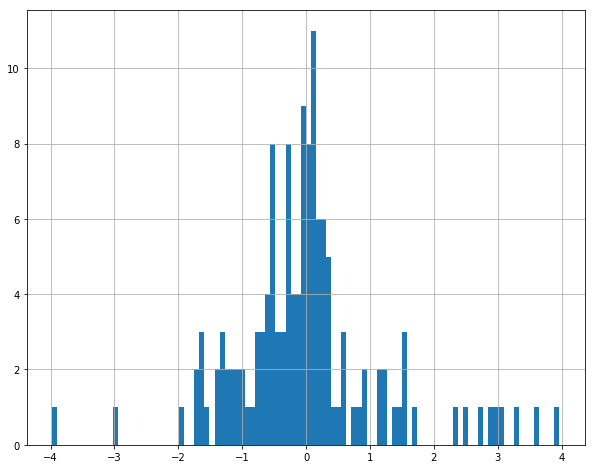

In [35]:
df.z_shifted.hist(bins=100)